<h1><b><font style="Times New Roman">ML, Misc Topics in Supervised Learning -2</h1></b></font>

<h2><b>Content</h2></b>






1. <h3><b>Regularisation</b></h3>


> - Recap of L1, L2 Regularisation
> - ElasticNet Regularisation

2. <h3><b>Model Calibration</b></h3>

>- Need for Calibration
>- Ways to perform Calibration
  >> a. Platt Scaling <br>
  >> b. Isotonic Regression

3.  <h3><b>RANSAC</b></h3>

>- When do we call models are Robust?.
>- Where is it used? Classification or Regression?

4.  <h3><b>Lift and Gain Charts</b></h3>

>- What is Lift?
>- What is Gain?
>- When do we use Lift and Gain Charts?




























**<h2>Quick Recap of Regularisation</h2>**

Before moving to miscellaneous algorithms, let us quickly revise the concepts of regularisation.

Regularisation is a type of regression in which the coefficient estimates are constrained, or shrunk towards zero. In other words, in order to avoid overfitting, this strategy discourages learning a more complicated or flexible model.

General form of regularisation :

```
                                minimize ( Loss function + 𝜆 ( regularisation norm ) )
```

 where your regularisation norm can be any of the following :


> 1. **L1 regularisation ( Lasso regression )**
> > <font color="green"> $min_w$ &nbsp;Loss_function + 𝜆||w|| where w is your weights</font>

> >When the tuning parameter 𝜆 is big enough, the L1 norm has the effect of causing some of the coefficient estimations to be precisely equal to zero, which is beneficial for penalizing high coefficients. As a result, the lasso approach performs feature selection and is said to produce sparse models..

> 2. **L2 regularisation ( Ridge regression )**
> > <font color="green">$min_w$ &nbsp;Loss_function + $𝜆||w||^2$ where w is your weights</font>

> >The coefficients for the least essential predictors will be reduced to almost zero. However, they will never be exactly zero. In other words, the final model will keep all predictors, i.e., unimportant characteristics will not be removed, but their impact will be reduced.

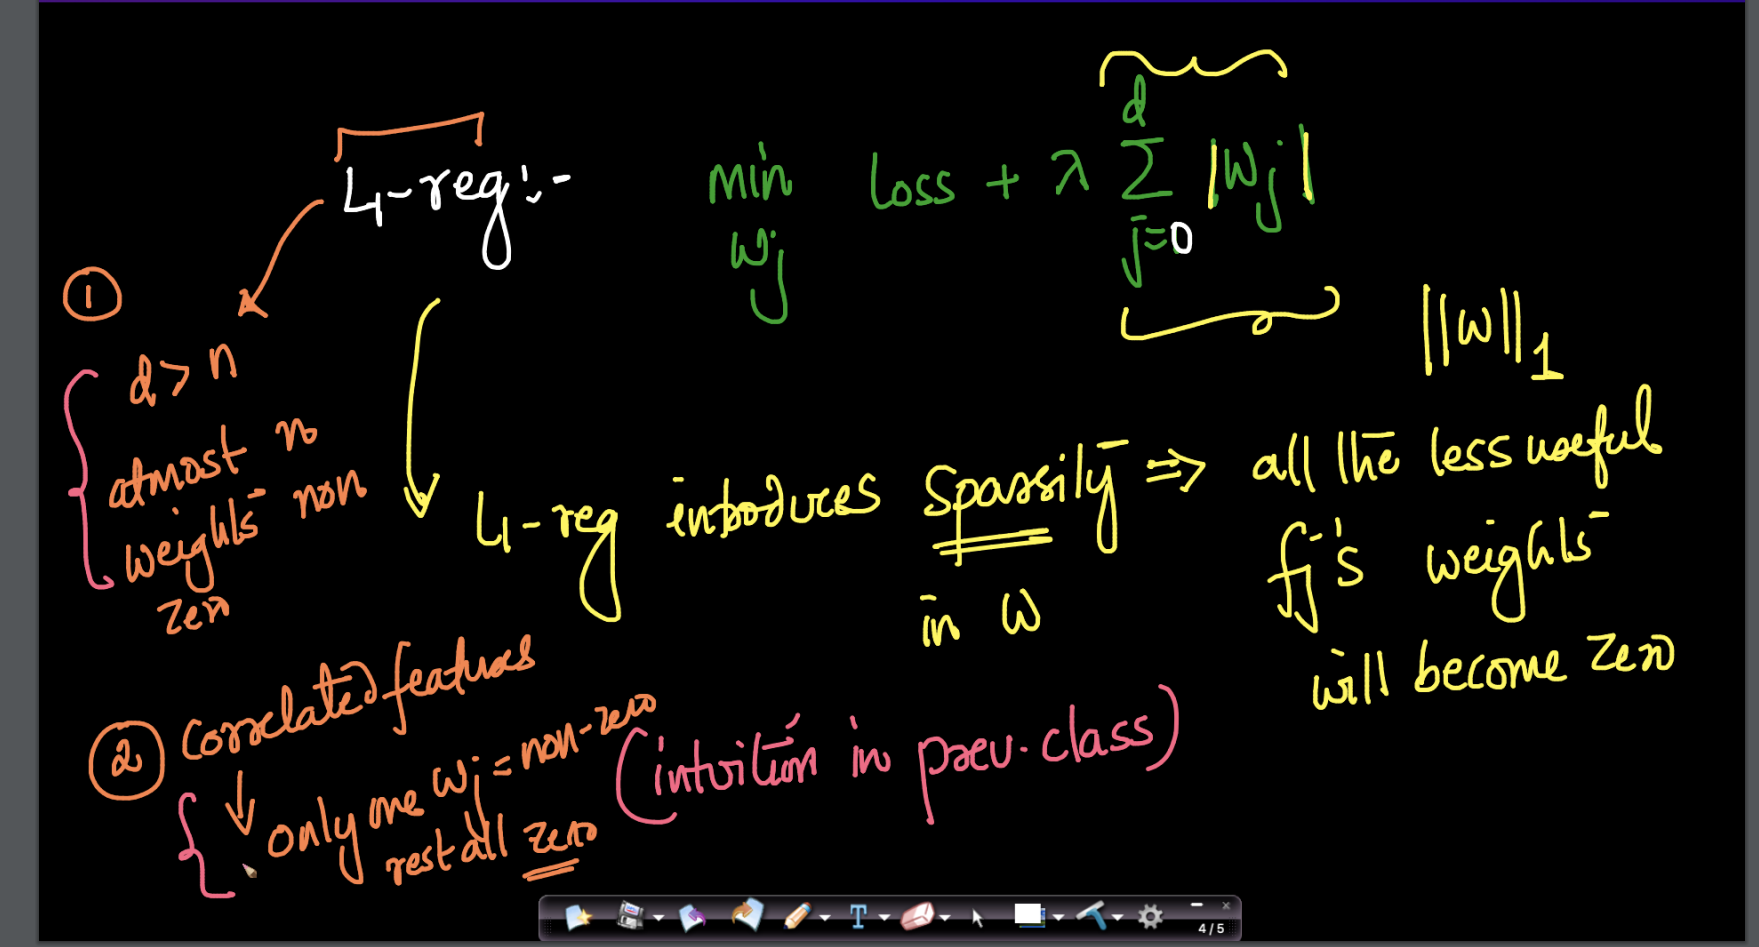

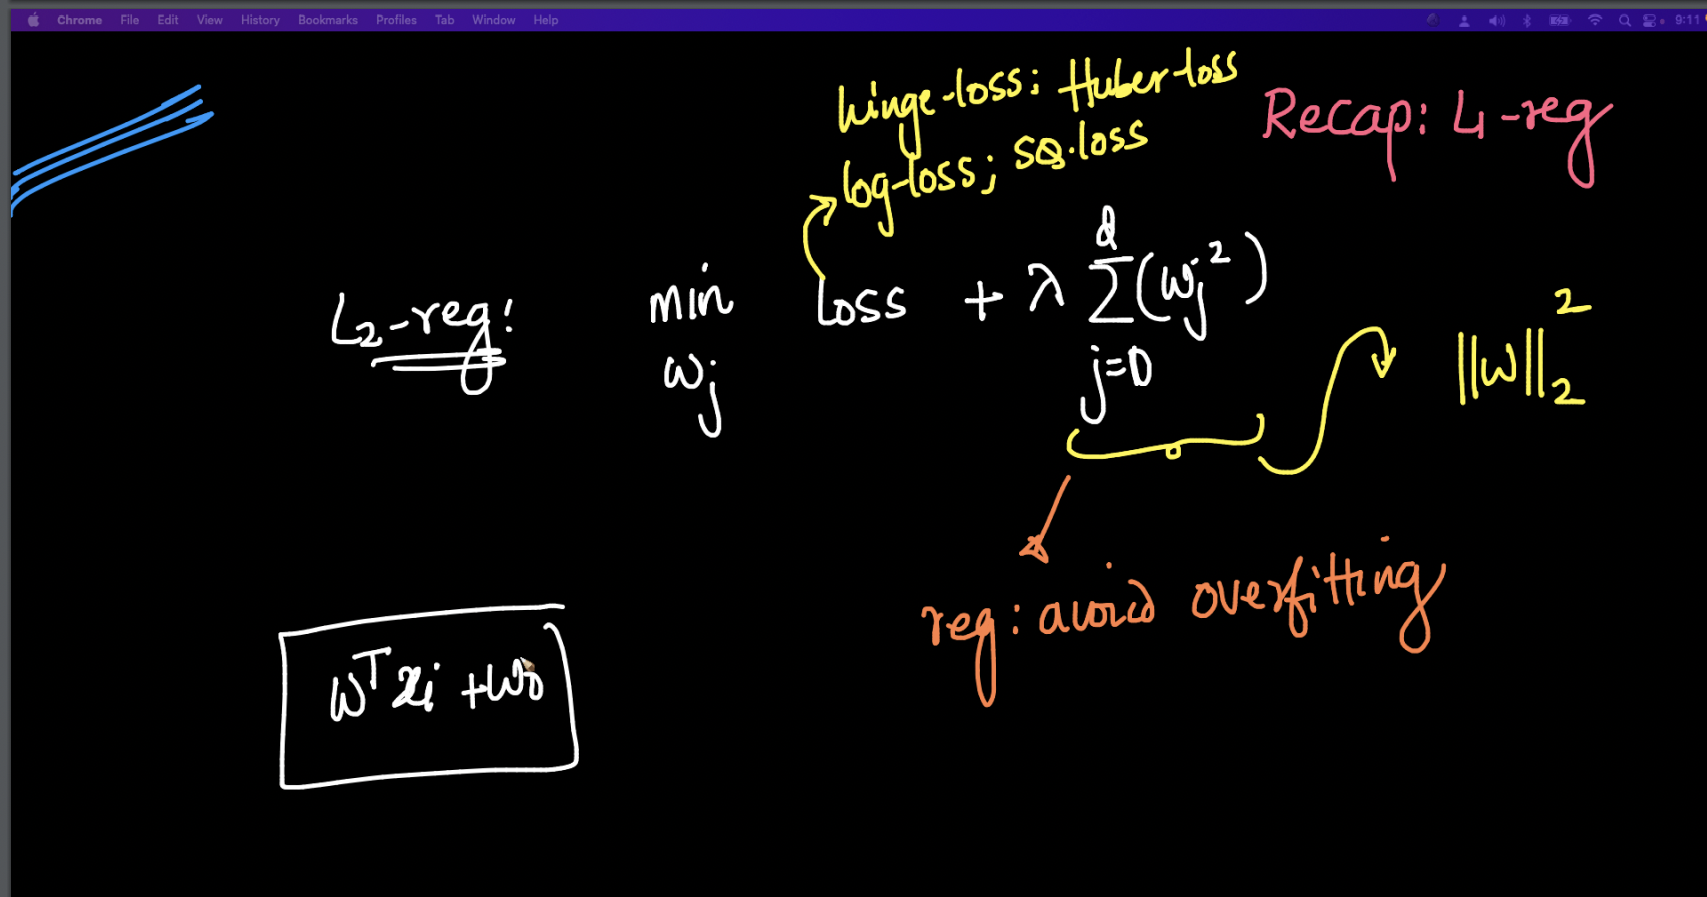

<h2><b>Elastic net Regularisation</h2></b>


> Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training. It was emerged to solve the shortfalls of L1 and L2 regularisations. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds. Elastic net aims at minimizing the following loss function:



>><font color="green"> $min_w$ &nbsp; Loss_function + $𝜆_1||w||^2$ +$𝜆_2$||w||</font>

> where $𝜆_1$ and $𝜆_2$ are two hyperparameters that we need to tune.
> > 1) If we increase both $𝜆_1$ and $𝜆_2$ , will control overfitting

> > 2) As we know $𝜆_2$ is L1 norm coeficient so, if we increase $𝜆_2$ keeping $𝜆_1$ constant, this will add sparsity to our model along with controlling overfitting. So we can try playing with these parameters to yield best result

> Another common notation for this is:
> > <font color="green">min Loss_function + $𝜆_1||w||^2$ + α$𝜆_1||w|$|</font><br>
> This is similar to above, just that we have α and $𝜆_1$ as parameters, keeping $𝜆_1$ as same we can keep on playing with α paramter





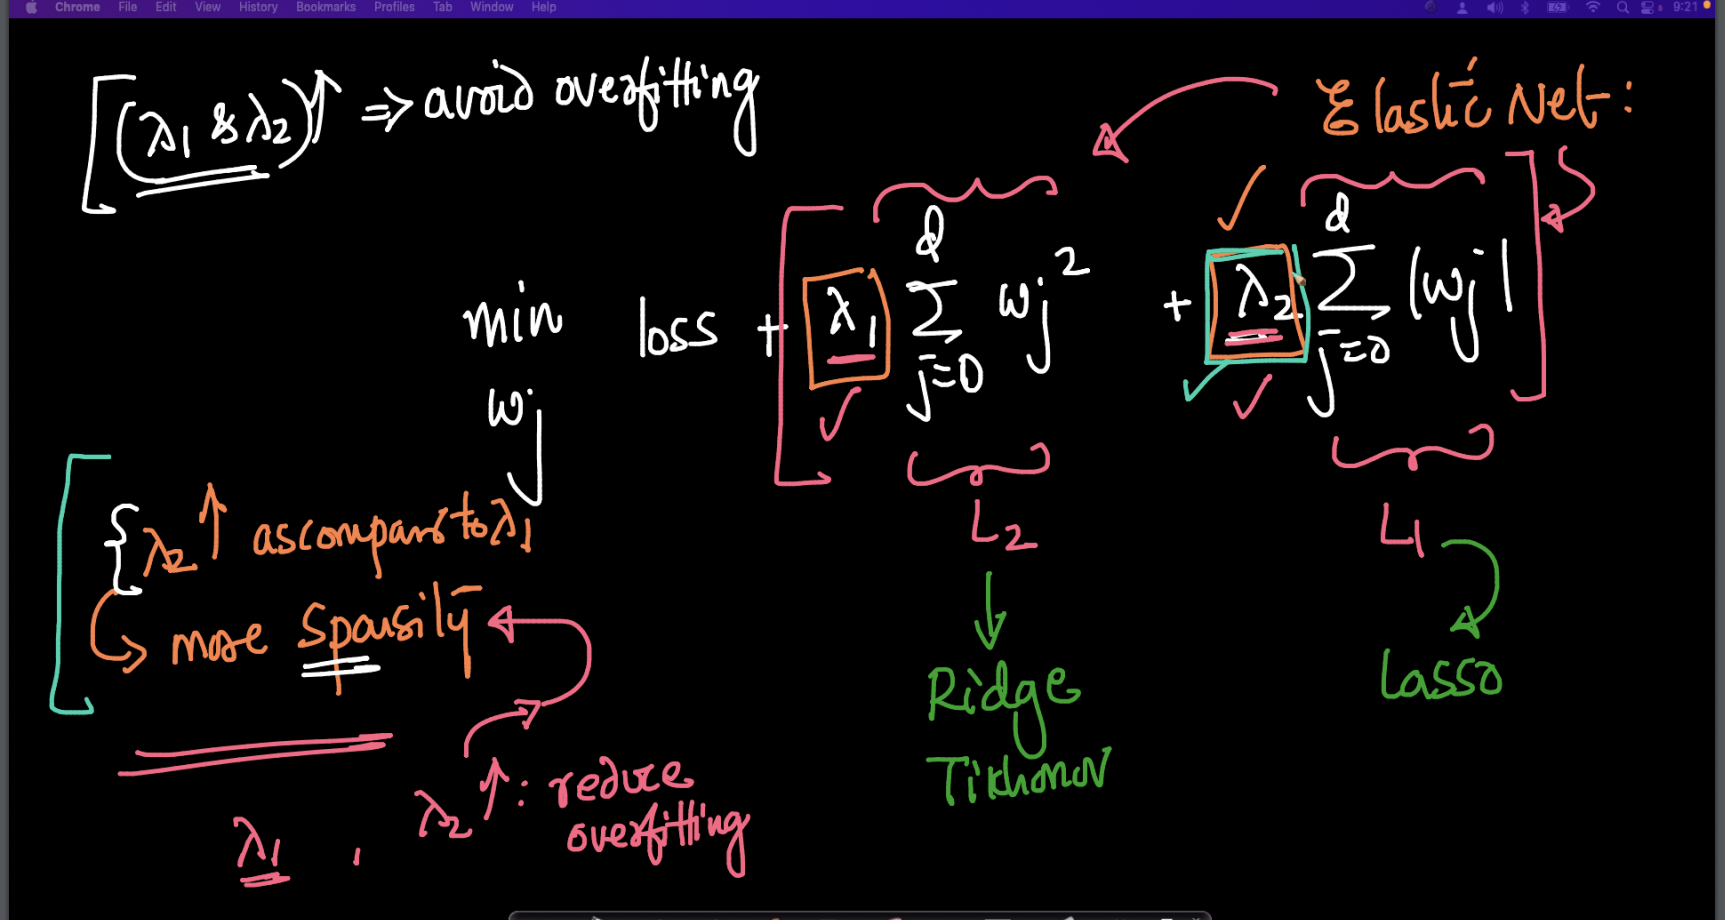

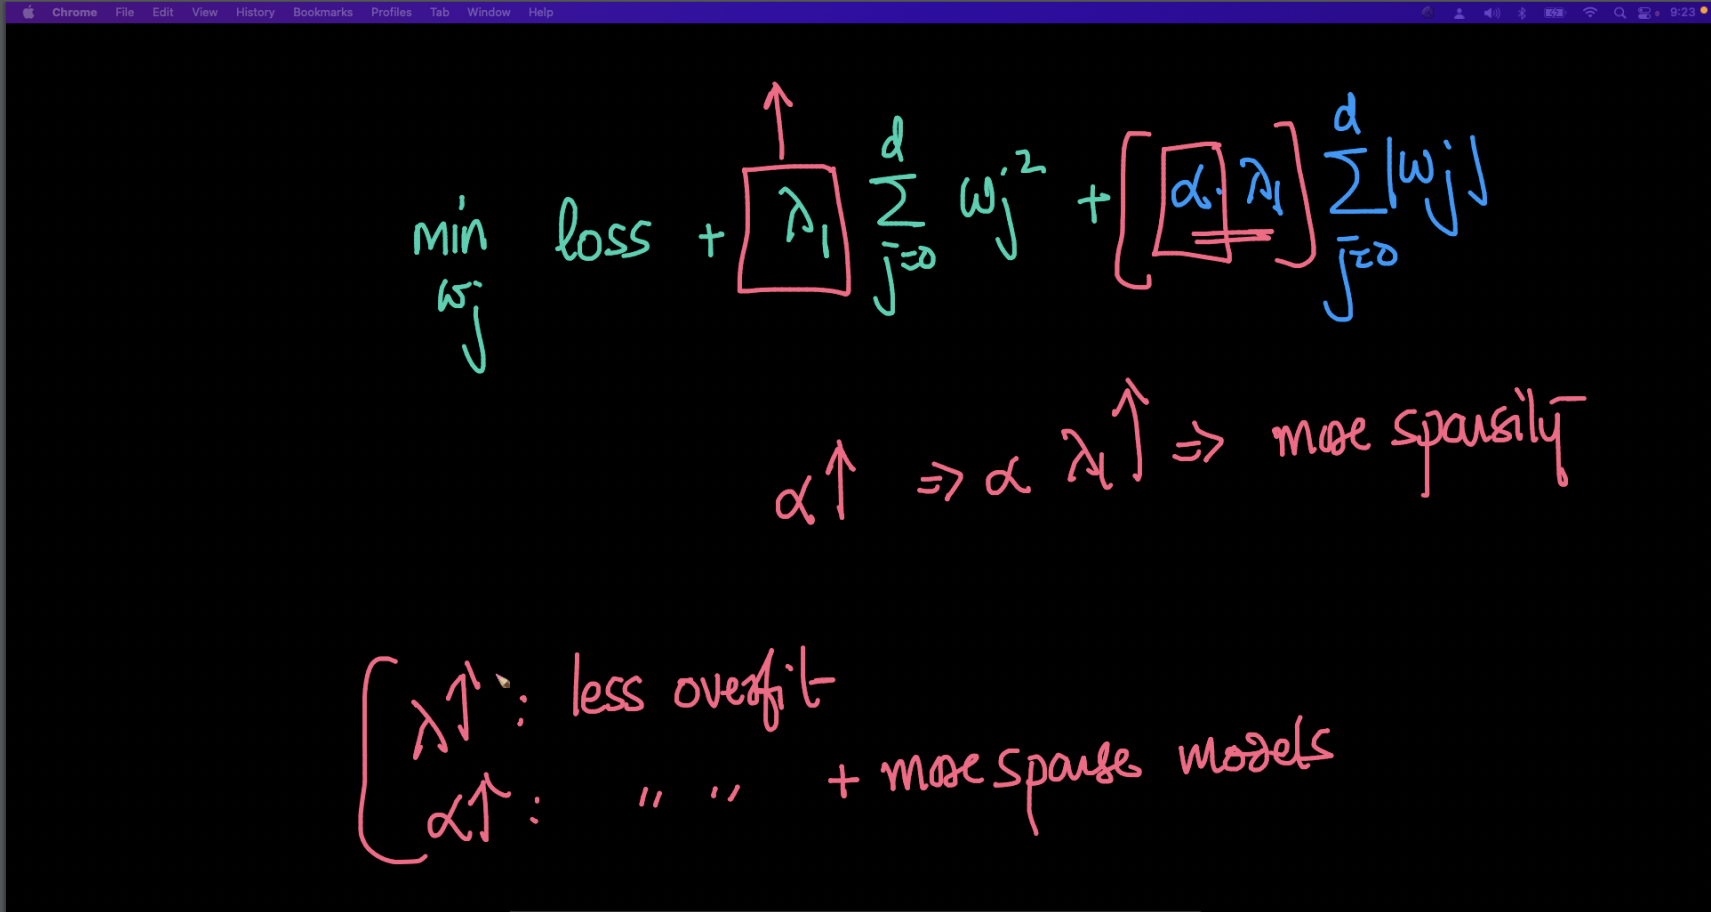

These regularisation techniques are defined in the  [sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#:~:text=User%20Guide.-,Parameters,-penalty%7B%E2%80%98l1%E2%80%99%2C%20%E2%80%98l2) and can be experimented with.

<h2><b>Model Calibration</h2></b>
  <p style font-size="12px">Collecting merely the predictions on a test set is rarely adequate when dealing with a classification challenge; we typically want to supplement them with some amount of confidence. To that purpose, we employ the associated probability, which is the likelihood generated by the classifier and determines the sample's class. We must be certain that these forecasts are correct representations of actual probabilities.<br><br>


To formally define, <br>
**Model calibration is the method of applying a post-processing procedure to an already trained model in order to enhance its probability estimation. As a result, if we investigate the samples that were expected to be positive with a probability of 0.75, we may expect 75 percent of them to be positive.**
</p>




<i>Steps to check calibration of model :



1.   For each group in you dataset (K-fold crossed), sort your predicted values in increasing order.
2.   For each group of sorted points, calculate fractions of positives in actual y's and mean of predicted y&#770; 's, and plot them.</i>


We would expect to get a perfect linear relationship between the computed probability and the fraction of positives.

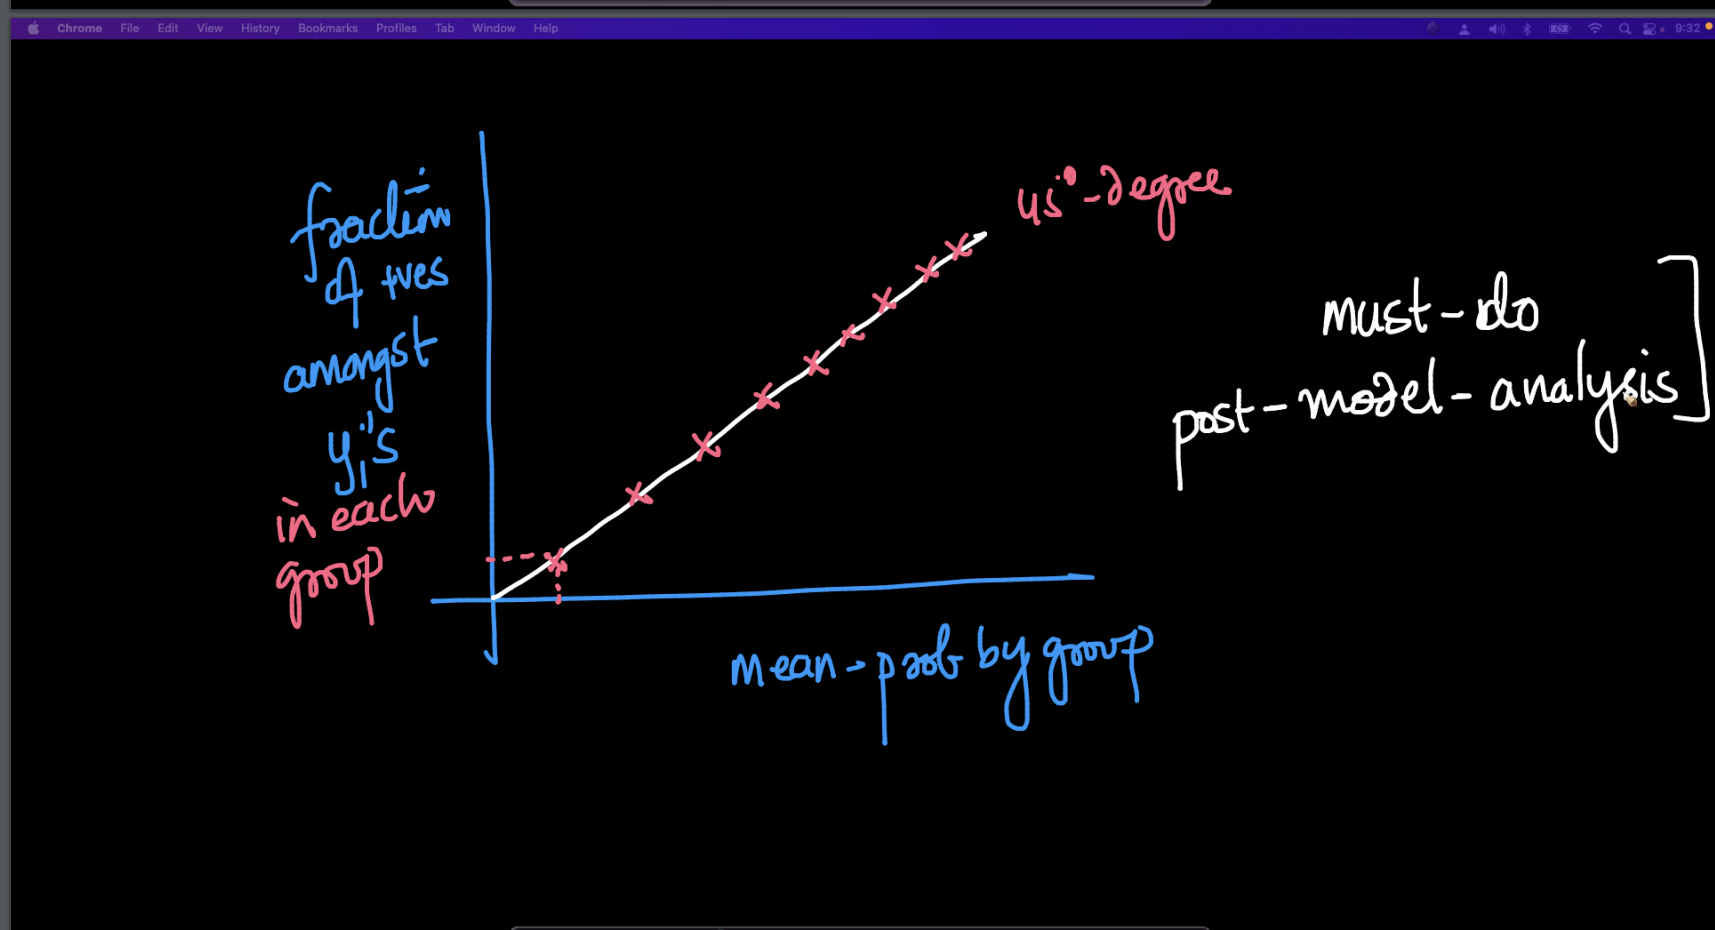

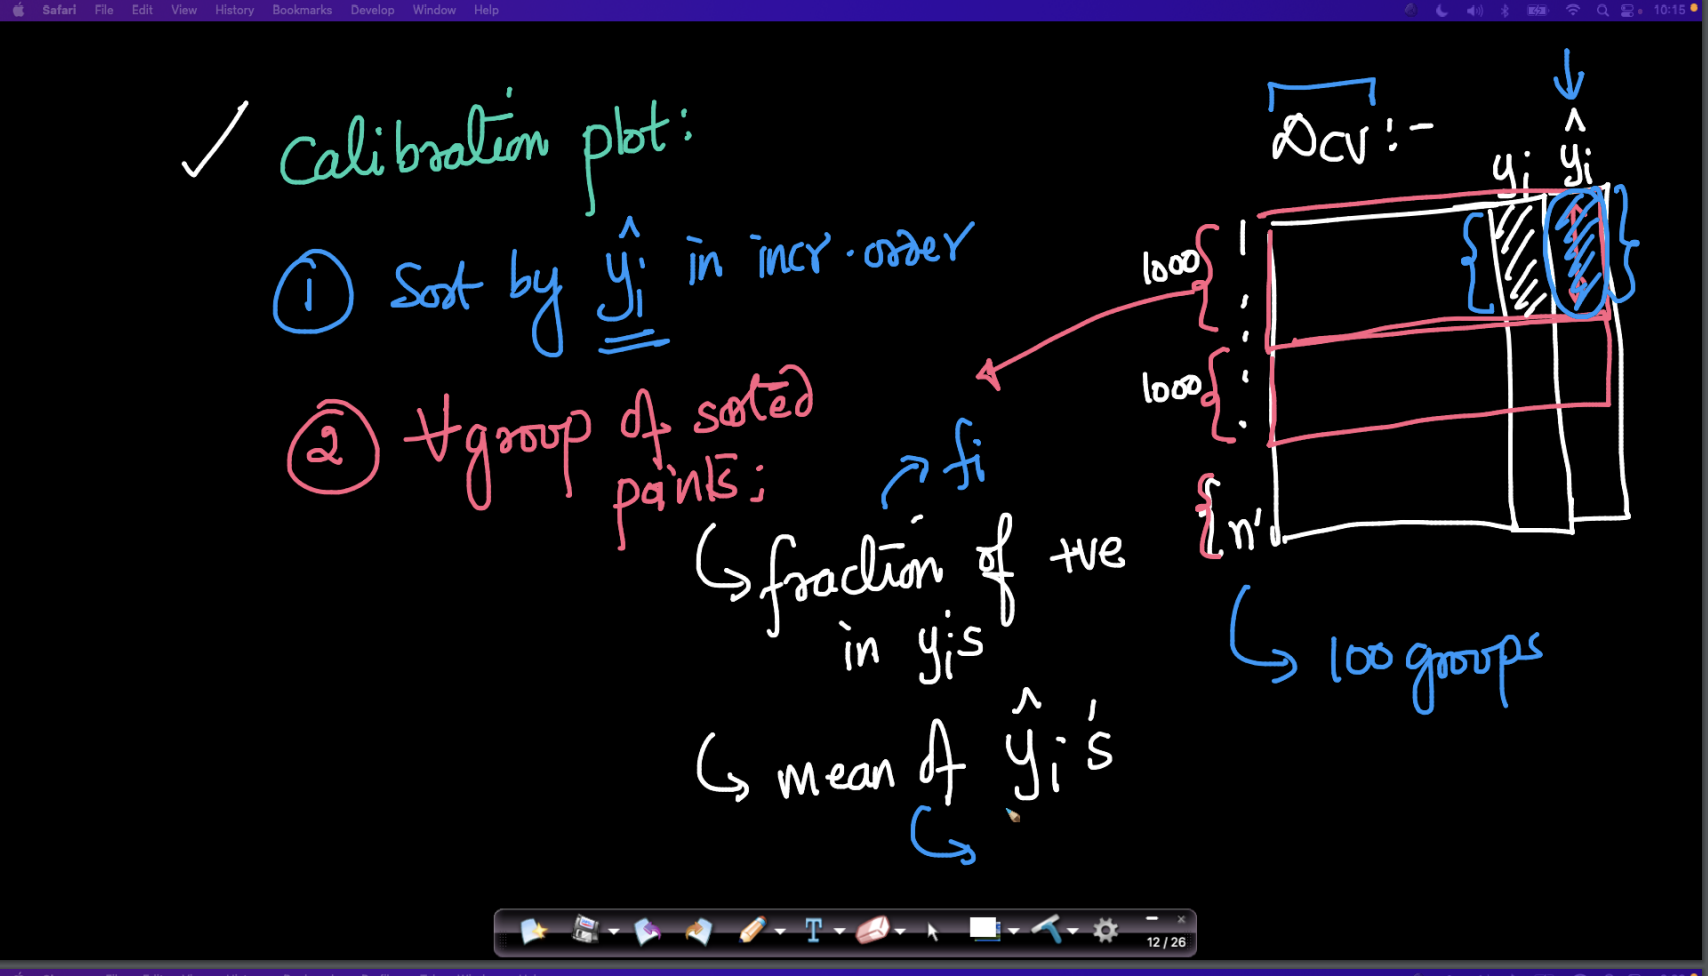

**But in practice, models are not perfectly  calibrated. Below is the calibration plot of different models trained on a dataset, and none of the following is perfectly linear** ( [link](https://scikit-learn.org/stable/modules/calibration.html) )

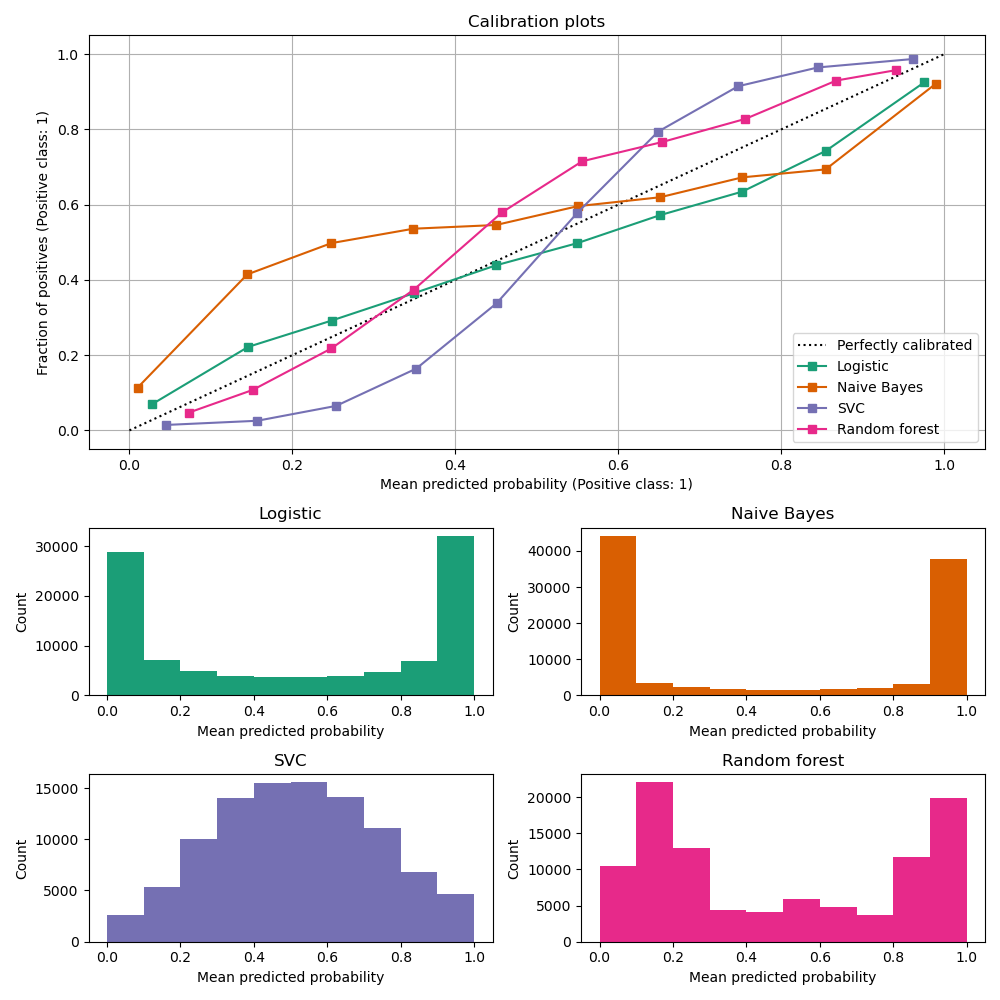

#### ***Question***: You may notice from the Actual plot, that in real world scenario the data will not be prefectly linear. So how to be fix this problem?

There are 2 options:
- Platt's Scaling:
    * Less popular.
    * Works only when Calibration plot is S-shaped.
- Isotonic Regression:
    * Most popular and widely used.
    * General purpose. Works irrespective of the shape of Calibration plots.

<i><h2><b>Ways to calibrate your model :</h2></b>

1.   Platt's scaling (less popular and works in limited situations)
2.   Isotonic regression ( most widely used )
</i>


<h3><b>Platt's Scaling / Sigmoid Scaling<h3></b>

Platt scaling is a way of transforming classification output into probability distribution. This method is based on assumption that most calibratrion curves are of S-shape (or sigmoid shape). So in order to calibrate our model, we just need to think of way to transform this S-shape curve to a linear graph which can be simply done by any linear regression or mapping model, also called as calibration model.




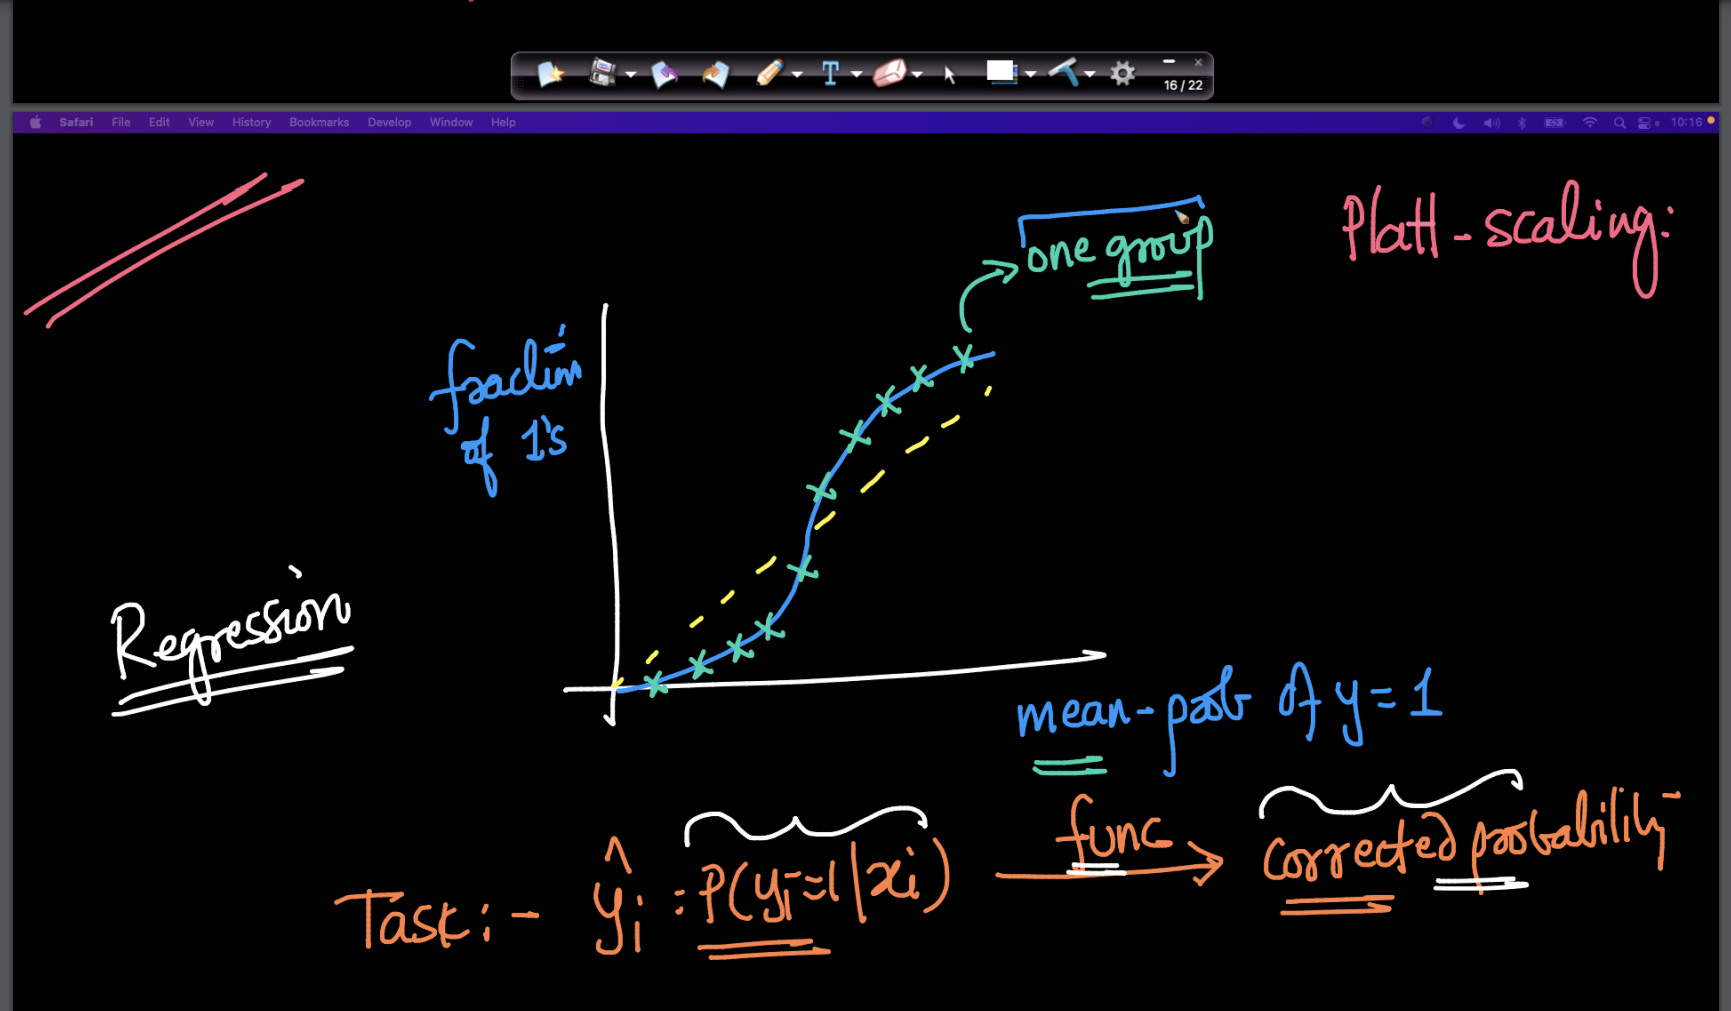

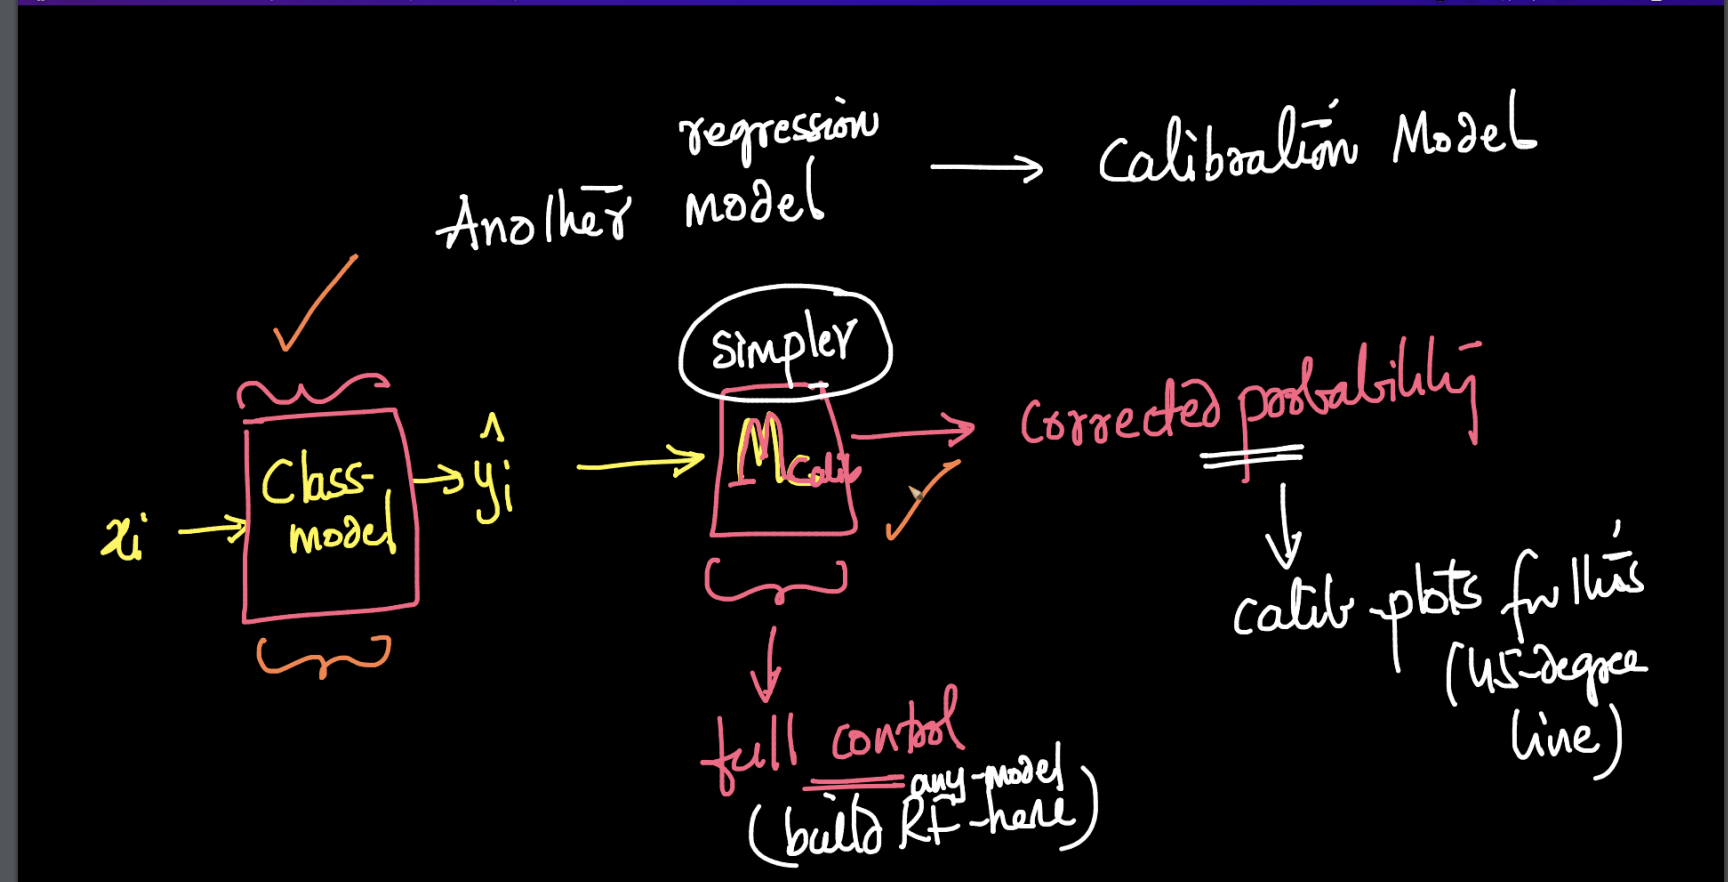

<b>In some cases, there might me some overfitting due to calibration model, which can be compensated by reducing the number of groups in dataset which implies each group have more data points</b>

As we discussed earlier, Calibration curve is of S-shape(sigmoid shape) and the  method  we can use to convert our predicted y&#770; 's is  using modified sigmoid function.<br><br>
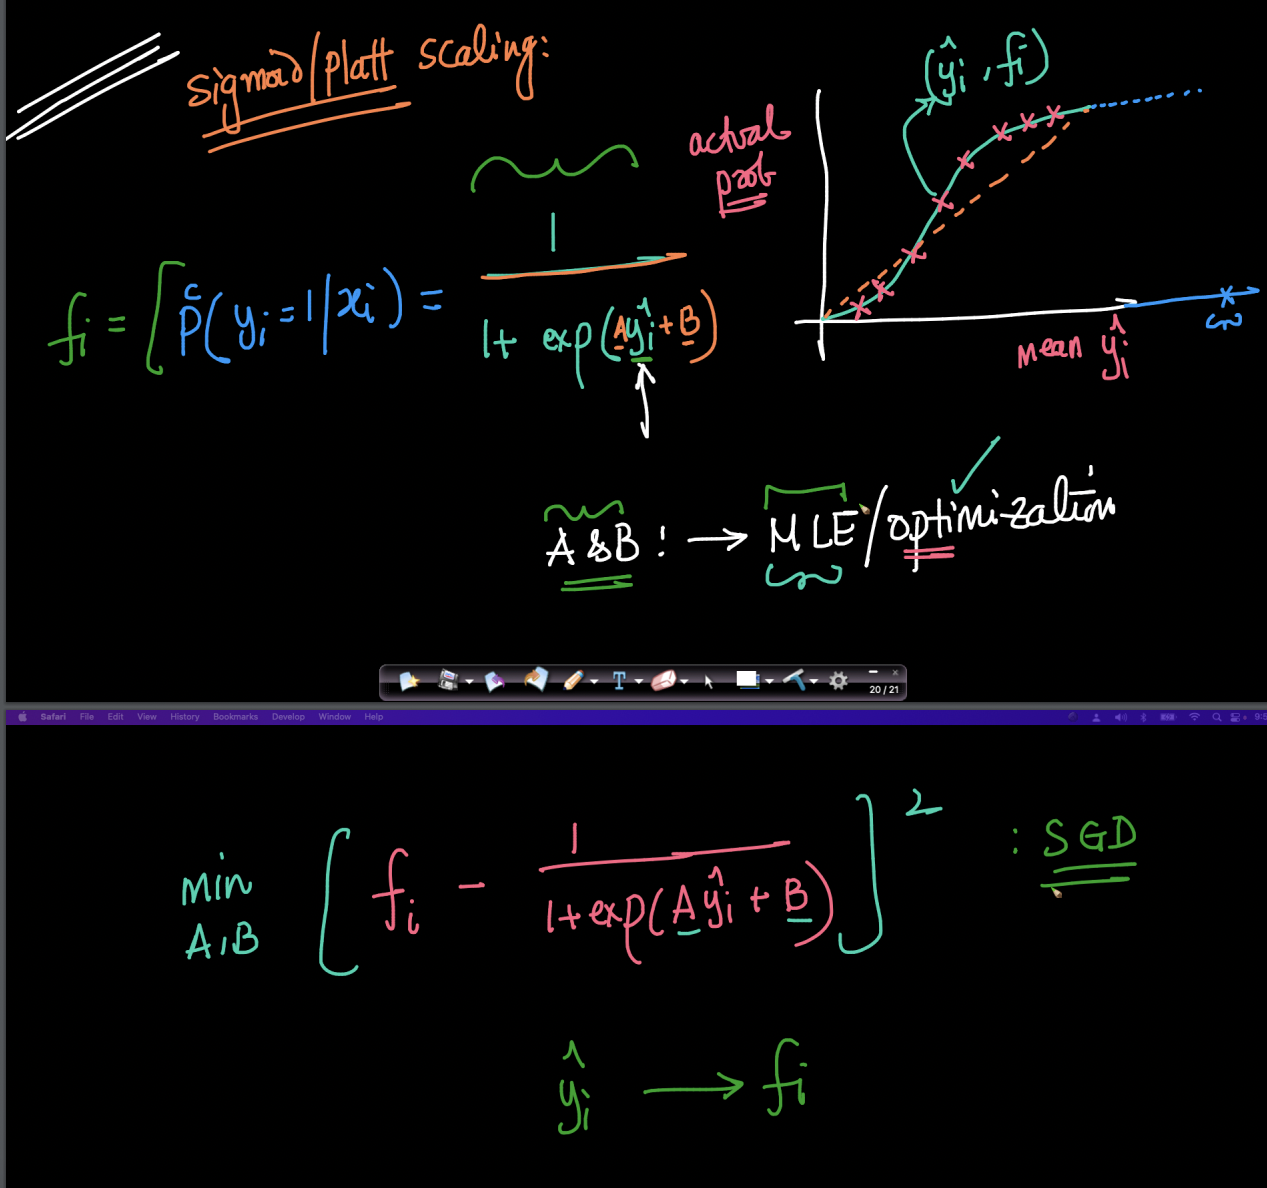

#### ***Question***: You may notice from the Actual plot, that in real world scenario the data will not be prefectly linear. So how to be fix this problem?

There are 2 options:
- Platt's Scaling:
    * Less popular.
    * Works only when Calibration plot is S-shaped.
- Isotonic Regression:
    * Most popular and widely used.
    * General purpose. Works irrespective of the shape of Calibration plots.

##### ***Question***: What if the Calibration plot is not S-shaped?
- In such cases, Platt-s Scaling won't work. If there is some non-linear trend, then we could use Isotonic Regression.

<img src='https://drive.google.com/uc?id=1ruZWBrREMWswGQSydC8-i0kMsGMkuFgv' width="825" height="400">


<h2><b>Isotonic regression</h2></b>

Since it's not always possible that Calibration curve is of S-shape, our Platt's scaling will not perform well in that case. So we go for Isotonic regression.
Isotonic regression is based on the fact that for any curve, if we do the piece wise distribution then every piece will almost behave like a linear curve or you can say every small piece will be straight line. So we can treat those pieces as individual linear regression models.<br><br>
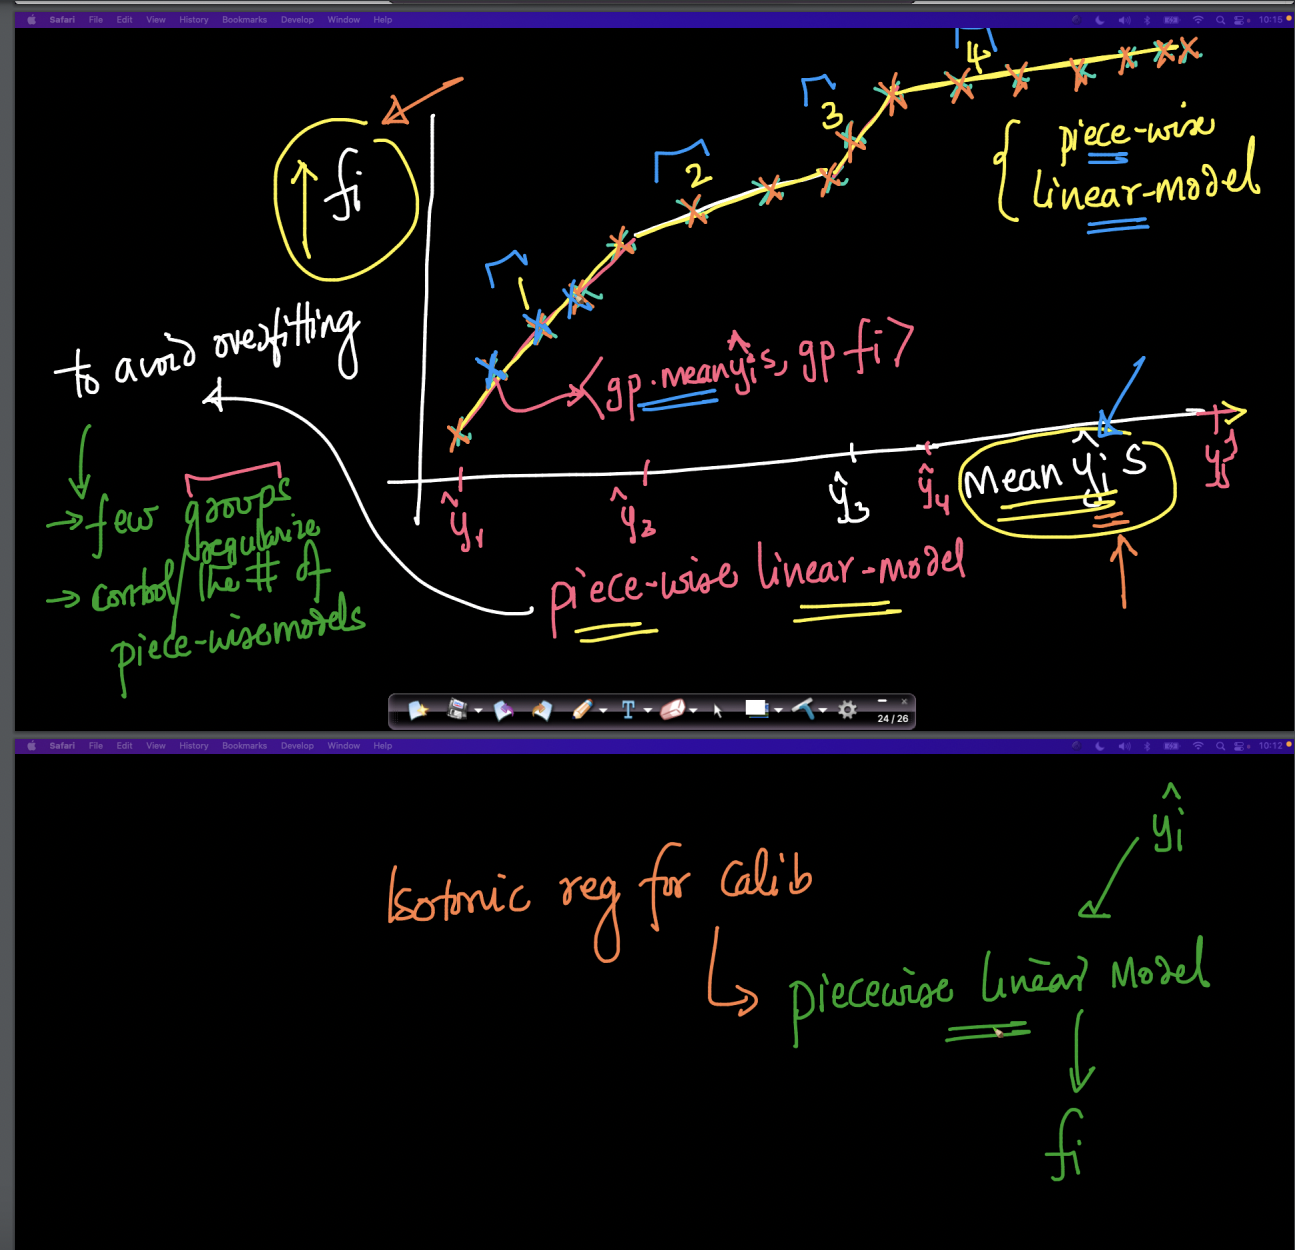

**Again as discussed earlier, to reduce overfitting in such cases we can either :**
*   **Reduce the number of groups in data**
*   **Tune the number of linear models**

Above concept can be summarised with the following diagram<br><br>

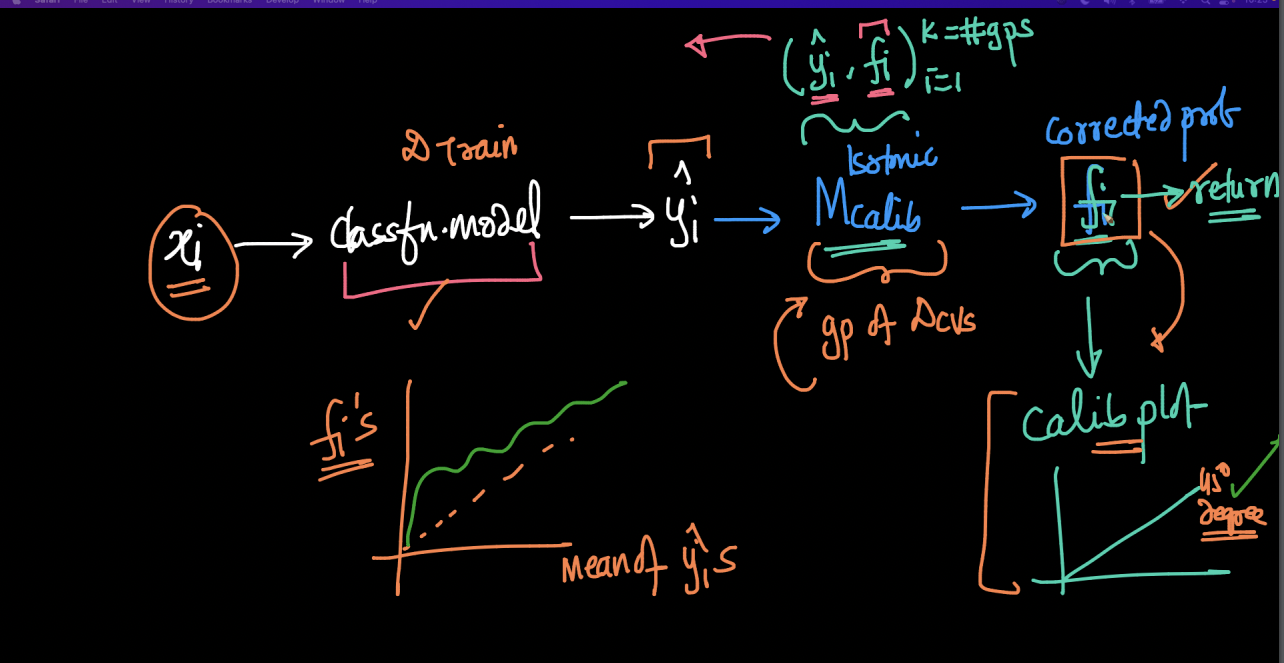

<p> Now if we were to make predictions on the points which are not in the range graph is created than we can simply either plateu the curve or extrapolate the curve extremes to that data point.</p>

So to summarise whole process :   


```
 query_point ->  Classification_model ->   y'   ->  calibration_model ->    F'
                                       (predicted                     (corrected probability )
                                       probability)
```

For code reference, please visit [here](https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html)

Some examples where model calibration (or, probability correction) is helpful:
- Health care where correct probabilty of a person being sick or not is critical
- Search based advertisement button's as probability of it being clicked determines price paid by the advertiser.



<h2><b>RANSAC</h2></b>

The RANSAC algorithm is a learning technique to estimate parameters of a model by random sampling of observed data. It is model agnostic or general purpose alogorithm which means it can be used with any model. It helps is making our model robust means less prone to outliers by eliminating them.


<b> Below are the steps of RANSAC algorithm </b> <br>
<ol>
<li>Choose a random subset D' from the dataset of size n' less than your dataset size n.</li>
<li>Fit your D' on any model.</li>
<li>For all points other than your random subset D', calculate error/loss with this new model and points which are close to out newly fitted model line will be added to consensus set.</li>
<li>if size of your consensus set is large enough with respect to some defined threshold than this consensus set can be used as the final dataset for training model.
<li>Else if size is not large enough, repeat step 1 to 4.
</ol>

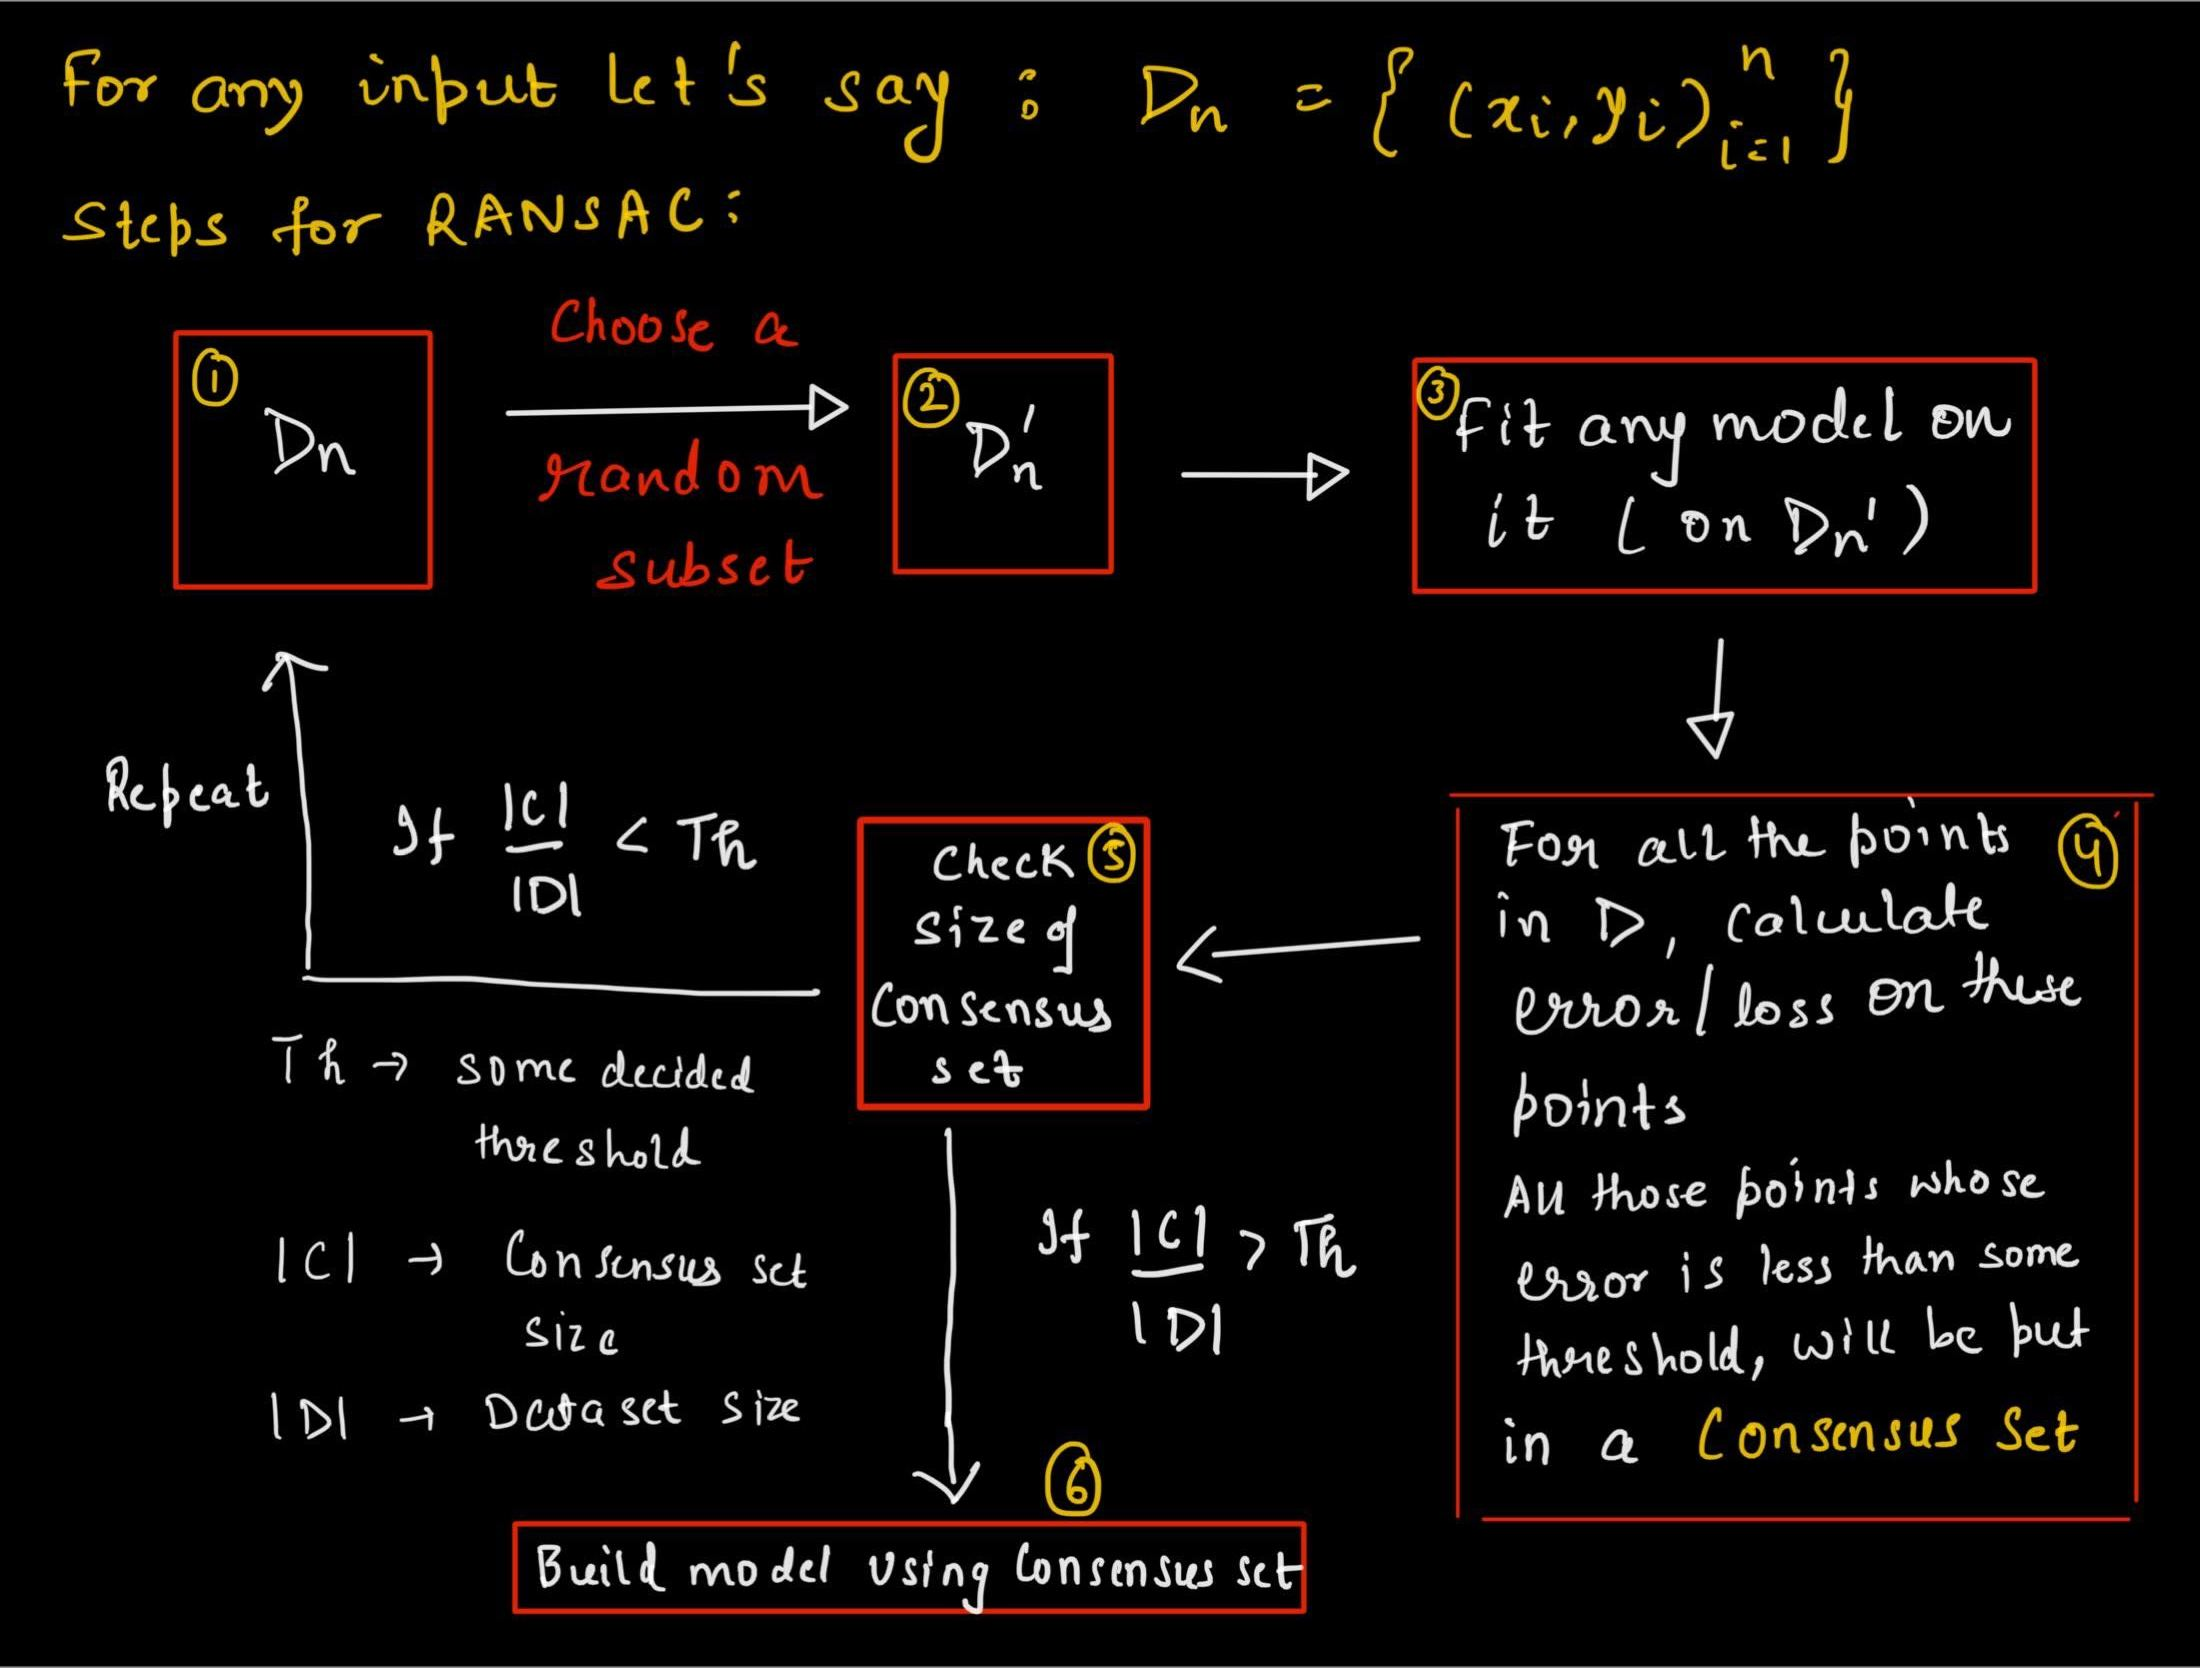


As explained above, if your consensus set passes the threshold then we will use that set for training our model as it does not contain any outliers.
<b> This method is not as same as general outlier detection and method removal as it is using the model and appropriate loss to find outliers.

#### ***Question***: In final model, why can't we take original subset along

---

with concensus?

- No, we cannot do that, as the original subset can contain outliers as well.


#### ***Question***: How to do we ensure that results are reproducible while using RANSAC?

- Simple, set the random-seed to unique value while generating random samples.


#### ***Question***: What is advisable removing outliers using techniques like IQR or using models like RANSAC?

- IQR is a univariate technique for EDA. RANSAC uses model output to determine outliers.
- If we don't have business expertise to determine outliers, it is recommended to use RANSAC.

<h2><b>Lift and Gain Chart</h2></b>

- A popular matrics in marketing analytics.
- Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model.
- Cumulative gains and lift charts are visual aids for measuring model performance.

    <img src='https://drive.google.com/uc?id=1wjNS7psIRUDzU2bYB_-v5nRvNVFnqx3Q' width="825" height="400">

    <img src='https://drive.google.com/uc?id=1duv7CGpADGAYNGvidDm3hTW2H2P5Bane' width="825" height="400">

    <img src='https://drive.google.com/uc?id=18dZgqcwiSPygJrKcItys0WE9nctVsUUB' width="825" height="400">

- Gain is the ratio between cumulative number of the positive observations up to a decile to total number of positive observations in the data.
- Gain chart is a chart drawn between gain on vertical
axis and decile on the horizontal axis.
- Lift is the ratio of number of positive observations up to decile i using the model to the expected number of positives up to that decile i based on a random model.
- Lift chart is the chart between lift on the vertical axis and the corresponding decile on the horizontal axis.

    <img src='https://drive.google.com/uc?id=1ofCHx1EBuxy3A1KW-FNr9AUhoB3ZX6X3' width="525" height="566">

- Both charts consist of a lift curve and a baseline.
- The greater the area between the lift curve and the baseline, the better the model.
